In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from env.EV_Sce_Env import EV_Sce_Env
import math
import seaborn as sns
import numpy as np

env = EV_Sce_Env('HY_2', seed=0)

In [12]:
#哈佛大学Data Science课程CS109推荐的matplotlib 默认设置
#可以方便的设置一次，保证整体风格一致
from matplotlib import rcParams
# #图片大小
# rcParams['figure.figsize'] = (10, 6)
# #图片精度
# rcParams['figure.dpi'] = 150
# #线宽
# rcParams['lines.linewidth'] = 2
#是否显示网格
rcParams['axes.grid'] = True
#axes 填充颜色为浅灰
rcParams['axes.facecolor'] = '#eeeeee'
# #字体大小为14
# rcParams['font.size'] = 14
#边框为无色
rcParams['patch.edgecolor'] = 'none'

In [13]:
T1 = 'T1'
env_name = 'SY_4'
mathlod = ['GA', 'OC', 'OR', 'NGH', 'GH']
sce = ['SY_2', 'SY_3', 'SY_4']
dir = {}
for i in mathlod:
    dir[i] = 'output/{}_{}_{}'.format(env_name, T1, i)

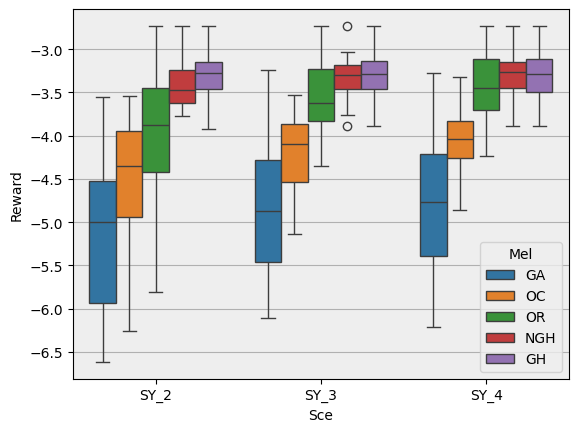

In [14]:
travel_time = pd.DataFrame(columns=['EV', 'Mel', 'Sce', 'Reward', 'Travel_time'])
j = 0
for s in sce:
    for m in mathlod:
        df_evg = pd.read_csv('output/{}_{}_{}/EV_g.csv'.format(s, T1, m))
        for i in range(df_evg.shape[0]):
            travel_time.loc[j] = [
                df_evg.iloc[i]['EV'], 
                m, 
                s,
                df_evg.iloc[i]['Reward'],
                df_evg.iloc[i]['Total']
            ]
            j += 1
ax = sns.boxplot(y="Reward", x="Sce", hue='Mel', data=travel_time)

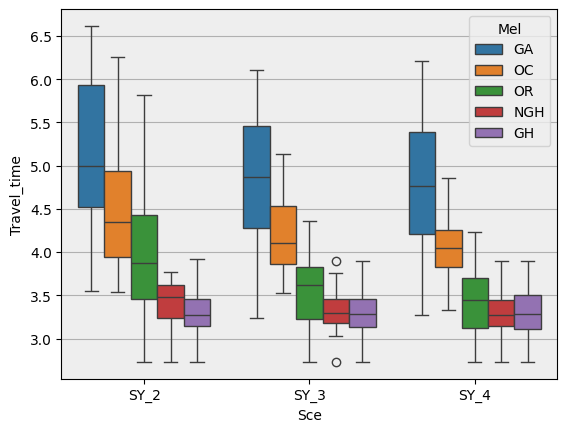

In [15]:
ax = sns.boxplot(y="Travel_time", x="Sce", hue='Mel', data=travel_time)

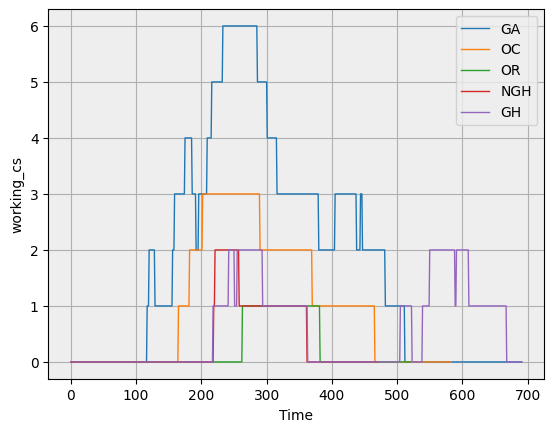

In [16]:
working_cs = pd.DataFrame(columns=mathlod)
for m in mathlod:
    df_cs = pd.read_csv('output/{}_{}_{}/CS.csv'.format(env_name, T1, m))

    columns = []
    for i in range(1, env.num_cs-1):
        columns.append('CS{}_charging_num'.format(i))

    df_cs['working_cs'] = (df_cs[columns]>0).sum(axis=1)
    # working_cs['Time'] = df_cs['time']
    working_cs[m] = df_cs['working_cs']

plt.plot(
    working_cs, label=working_cs.columns,
    linewidth=1
    )
plt.xlabel('Time')
plt.ylabel('working_cs')
plt.legend()